# 💳 Credit Card Fraud Detection  
### ✨ Task 2 – CodSoft Data Science Internship  
*Author*: Kripa Sharma M
*Goal*: Build a machine learning model to detect fraudulent credit card transactions.  

---

## 🗂 Project Overview  
- 📌 Load & explore dataset  
- 📊 Visualize fraud distribution  
- 🔁 Preprocess and normalize data  
- ⚖ Handle class imbalance (SMOTE)  
- 🧠 Train & compare Logistic Regression + Random Forest  
- 📈 Evaluate with precision, recall, F1-score, and confusion matrix  
- 💾 Push to GitHub & submit

---

> 💡 Fraud detection is a *real-world, high-impact* problem where accuracy alone isn't enough — let's dive into smarter metrics and smarter solutions!

In [6]:
#Step 1:Load dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown

# Set theme
sns.set_theme(style="whitegrid", palette="flare")
plt.rcParams["figure.figsize"] = (10, 5)

# Load dataset
df = pd.read_csv("creditcard.csv")

# Show structure
display(Markdown(f"*Dataset Shape:* {df.shape[0]} rows × {df.shape[1]} columns"))
df.head()

*Dataset Shape:* 284807 rows × 31 columns

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
# ✨ STEP 2: Preprocessing – Normalize + Clean + Rename 

from sklearn.preprocessing import StandardScaler
from IPython.display import display, Markdown

# 1. Normalize the 'Amount' column
scaler = StandardScaler()
df['Normalized_Amount'] = scaler.fit_transform(df[['Amount']])

# 2. Drop the 'Time' and original 'Amount' columns
df.drop(['Time', 'Amount'], axis=1, inplace=True)

# 3. Rename columns like V1 → Feature_1
new_columns = []
feature_counter = 1
for col in df.columns:
    if col.startswith('V'):
        new_columns.append(f"Feature_{feature_counter}")
        feature_counter += 1
    else:
        new_columns.append(col)
df.columns = new_columns

# 4. Preview final structure
display(Markdown("### Preview After Preprocessing"))
df.head()

### Preview After Preprocessing

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Class,Normalized_Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


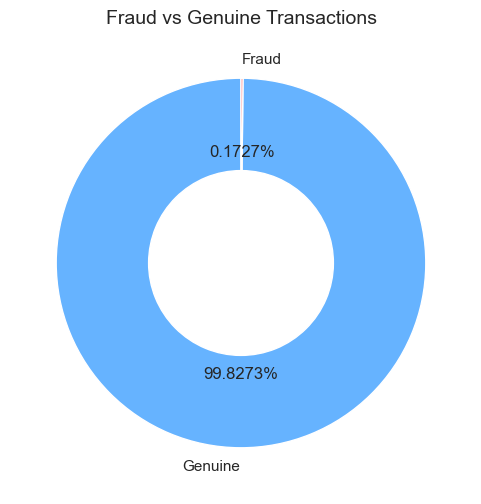

C:\Users\kripa\AppData\Local\Temp\ipykernel_14816\1758871103.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Class", data=df, palette=colors)


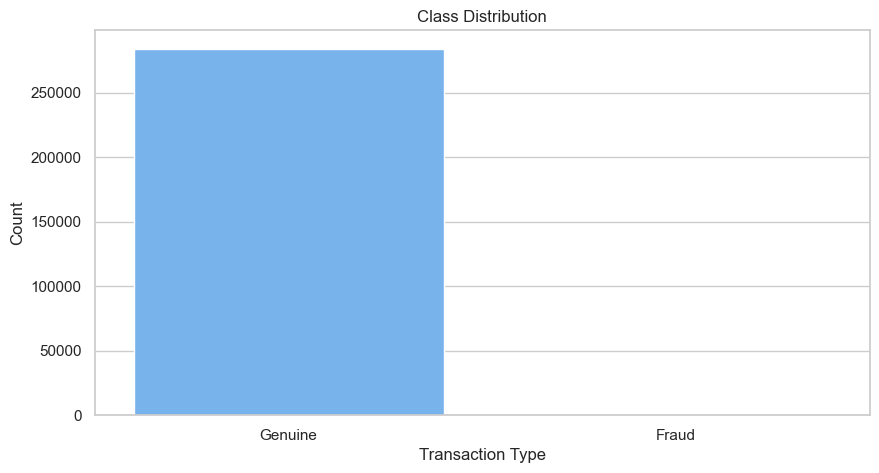

In [8]:
#STEP 3: Fraud vs Genuine Transaction Distribution

# Count values
class_counts = df["Class"].value_counts()
labels = ['Genuine', 'Fraud']
colors = ['#66b3ff', '#ff6666']

# Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=labels, autopct='%1.4f%%', startangle=90, colors=colors, 
        wedgeprops=dict(width=0.5, edgecolor='white'))
plt.title('Fraud vs Genuine Transactions', fontsize=14)
plt.show()

# Countplot
sns.countplot(x="Class", data=df, palette=colors)
plt.xticks([0, 1], labels)
plt.title("Class Distribution")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show()

In [9]:
# 💬 Summary Text Block
fraud = class_counts[1]
genuine = class_counts[0]
total = fraud + genuine
fraud_pct = round((fraud / total) * 100, 4)

display(Markdown(f"""
### 📌 Class Distribution Summary  
- 🧾 *Total Transactions*: {total}  
- ✅ *Genuine*: {genuine}  
- 🚨 *Fraud*: {fraud}  
- ⚠ *Fraud Rate: **{fraud_pct}%*
"""))


### 📌 Class Distribution Summary  
- 🧾 *Total Transactions*: 284807  
- ✅ *Genuine*: 284315  
- 🚨 *Fraud*: 492  
- ⚠ *Fraud Rate: **0.1727%*


In [10]:
# ⚖ STEP 4: Handle Class Imbalance using SMOTE (Oversampling)

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# ✅ Split features & target
X = df.drop("Class", axis=1)
y = df["Class"]

# ⚙ Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# ✅ Print new shape
print("Before SMOTE:", y.value_counts().to_dict())
print("After SMOTE:", y_resampled.value_counts().to_dict())

Before SMOTE: {0: 284315, 1: 492}
After SMOTE: {0: 284315, 1: 284315}


C:\Users\kripa\AppData\Local\Temp\ipykernel_14816\3149291838.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette=["#66b3ff", "#ff6666"], ax=axes[0])
C:\Users\kripa\AppData\Local\Temp\ipykernel_14816\3149291838.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['Genuine', 'Fraud'])
C:\Users\kripa\AppData\Local\Temp\ipykernel_14816\3149291838.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_resampled, palette=["#66b3ff", "#ff6666"], ax=axes[1])
C:\Users\kripa\AppData\Local\Temp\ipykernel_14816\3149291838.py:16: UserWarning: set_ticklabels() should only be us

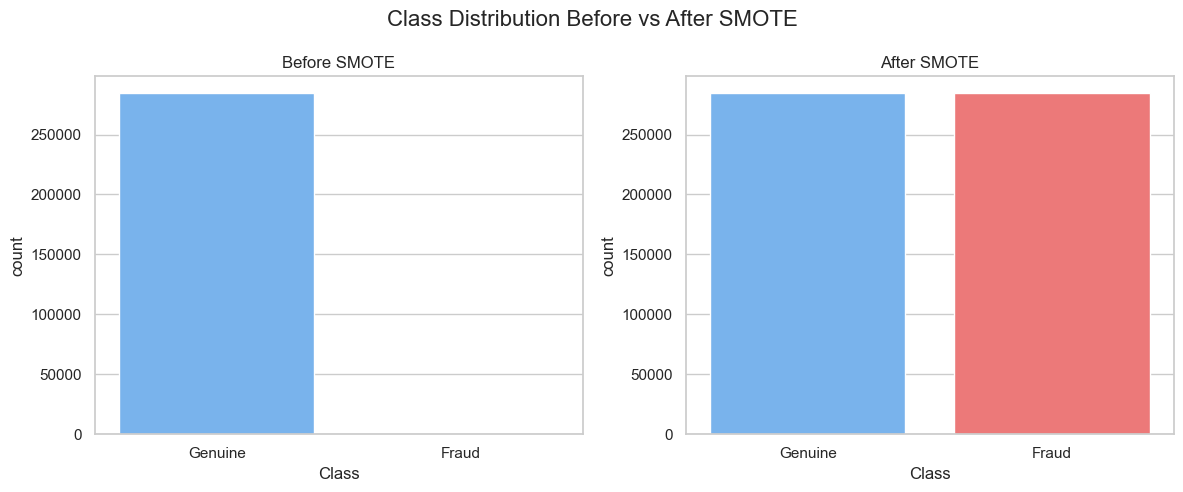

In [11]:
# 🎨 SMOTE Before vs After Class Distribution

import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Before SMOTE
sns.countplot(x=y, palette=["#66b3ff", "#ff6666"], ax=axes[0])
axes[0].set_title("Before SMOTE")
axes[0].set_xticklabels(['Genuine', 'Fraud'])

# After SMOTE
sns.countplot(x=y_resampled, palette=["#66b3ff", "#ff6666"], ax=axes[1])
axes[1].set_title("After SMOTE")
axes[1].set_xticklabels(['Genuine', 'Fraud'])

plt.suptitle("Class Distribution Before vs After SMOTE", fontsize=16)
plt.tight_layout()
plt.show()

In [12]:
# 🧠 STEP 5: Train & Compare Logistic Regression and Random Forest

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 🔀 Split the SMOTE-balanced data
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42)

# ✅ Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)

# ✅ Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

In [13]:
# Styled Classification Reports
def get_report(y_true, y_pred, model_name):
    report = classification_report(y_true, y_pred, output_dict=True)
    df_report = pd.DataFrame(report).transpose()
    display(Markdown(f"### 📊 {model_name} Performance"))
    return df_report.style.background_gradient(cmap='YlGnBu').format("{:.2f}")

# Logistic Regression Report
get_report(y_test, log_pred, "Logistic Regression")

# Random Forest Report
get_report(y_test, rf_pred, "Random Forest")

### 📊 Logistic Regression Performance

### 📊 Random Forest Performance

,precision,recall,f1-score,support
0,1.00,1.00,1.00,56750.00
1,1.00,1.00,1.00,56976.00
accuracy,1.00,1.00,1.00,1.00
macro avg,1.00,1.00,1.00,113726.00
weighted avg,1.00,1.00,1.00,113726.00


In [14]:
get_report(y_test, log_pred, "Logistic Regression")

### 📊 Logistic Regression Performance

,precision,recall,f1-score,support
0,0.92,0.98,0.95,56750.00
1,0.97,0.92,0.95,56976.00
accuracy,0.95,0.95,0.95,0.95
macro avg,0.95,0.95,0.95,113726.00
weighted avg,0.95,0.95,0.95,113726.00


C:\Users\kripa\AppData\Local\Temp\ipykernel_14816\3835584094.py:15: UserWarning: Glyph 127794 (\N{EVERGREEN TREE}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\kripa\anaconda3\envs\titanic_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127794 (\N{EVERGREEN TREE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


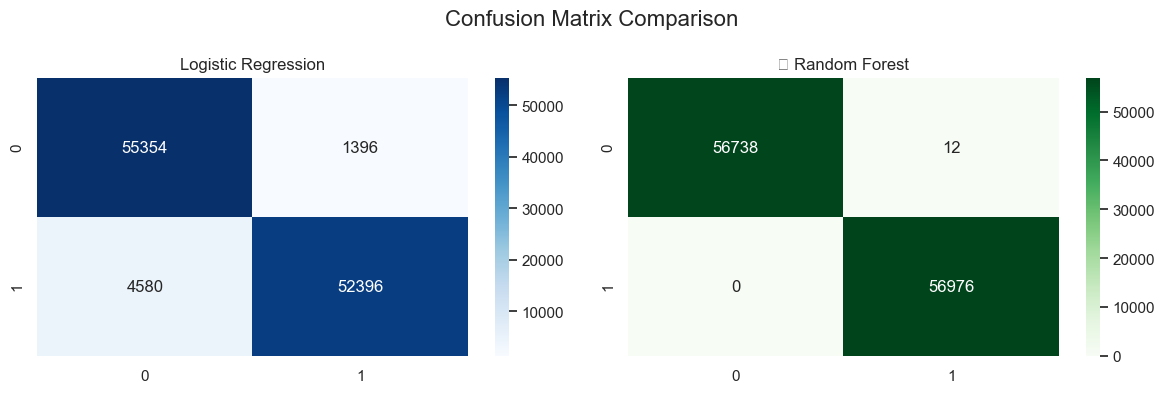

In [15]:
# Compare Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Logistic Confusion Matrix
sns.heatmap(confusion_matrix(y_test, log_pred), annot=True, fmt='d',
            cmap='Blues', ax=axes[0])
axes[0].set_title("Logistic Regression")

# Random Forest Confusion Matrix
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt='d',
            cmap='Greens', ax=axes[1])
axes[1].set_title("🌲 Random Forest")

plt.suptitle("Confusion Matrix Comparison", fontsize=16)
plt.tight_layout()
plt.show()

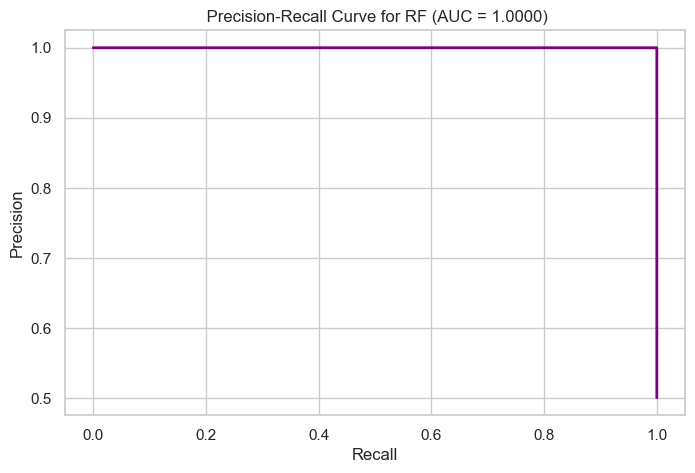

In [17]:
#Precision-Recall Curve(Random Forest)
from sklearn.metrics import precision_recall_curve, auc

# Get prediction probabilities
y_probs = rf_model.predict_proba(X_test)[:, 1]

# Compute precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
pr_auc = auc(recall, precision)

# 📈 Plot
plt.figure(figsize=(8, 5))
plt.plot(recall, precision, color="purple", linewidth=2)
plt.title(f" Precision-Recall Curve for RF (AUC = {pr_auc:.4f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid(True)
plt.show()

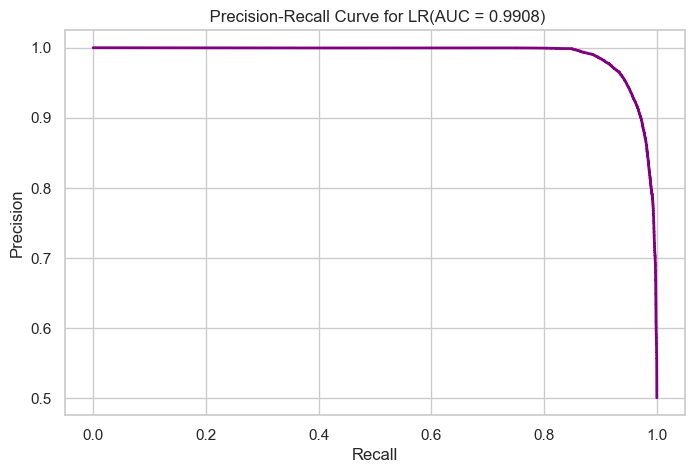

In [18]:
from sklearn.metrics import precision_recall_curve, auc

# Get prediction probabilities
y_probs = log_model.predict_proba(X_test)[:, 1]

# Compute precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
pr_auc = auc(recall, precision)

# 📈 Plot
plt.figure(figsize=(8, 5))
plt.plot(recall, precision, color="purple", linewidth=2)
plt.title(f" Precision-Recall Curve for LR(AUC = {pr_auc:.4f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid(True)
plt.show()